In [2]:
import scipy.io.wavfile as wavio
sr, data = wavio.read("joint_freqs.wav")

In [3]:
data

array([-22, -29, -19, ...,  37,  44,  47], dtype=int16)

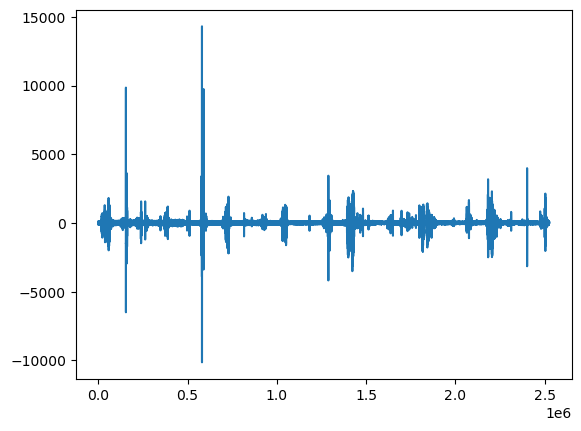

In [4]:
import matplotlib.pyplot as plt
plt.plot(data)

joint 0:	2
		3.8
		6.5
		
joint 1:	9.5
		11.8
		14

joint 2:  	17.5
		19
		22

joint 3:	25
		27.2
		30
		
joint 4:	36
		37.5-37.8

joint 5: 	44
		45.5
		48.2
		
joint 6 (EE)	52.5
		55

In [5]:
joint_recs = {
    "j_0" : [2, 3.8, 6.5],
    "j_1" : [9.5, 11.8, 14],
    "j_2" : [17.5, 19, 22],
    "j_3" : [25, 27.2, 30],
    "j_4" : [36],
    "j_5" : [44, 45.5, 48.2],
    "j_6" : [52, 55]
}

In [6]:
joint_audio = {}
for key, val in joint_recs.items():
    joint_audio[key] = [data[int(sr*t):int(sr*(t+1))] for t in val]

In [7]:
joint_audio

{'j_0': [array([ 31,  69, 101, ..., -61, -49, -41], dtype=int16),
  array([117,  98,  54, ...,  54,  59,  35], dtype=int16),
  array([ 24,  25,  13, ..., -19,  23,  48], dtype=int16)],
 'j_1': [array([-26, -49, -23, ...,  31,  28,  21], dtype=int16),
  array([ -9,  -9, -23, ..., -46, -37, -30], dtype=int16),
  array([-38, -38, -45, ..., -32, -35, -47], dtype=int16)],
 'j_2': [array([-23, -18,  -7, ..., -14, -14, -18], dtype=int16),
  array([-17, -11,   8, ...,   1,  12,  36], dtype=int16),
  array([-40, -66, -68, ..., -18, -31, -46], dtype=int16)],
 'j_3': [array([-54, -59, -49, ...,  12,   1, -21], dtype=int16),
  array([68, 71, 39, ..., -1,  6, -3], dtype=int16),
  array([ 95,  45, -18, ...,  -6,  -7, -30], dtype=int16)],
 'j_4': [array([ 44,  31,   5, ..., -54, -69, -48], dtype=int16)],
 'j_5': [array([-24, -16, -21, ...,  52,  53,  37], dtype=int16),
  array([17, 43, 60, ..., -3,  4,  0], dtype=int16),
  array([-16,  -8,  -6, ..., -53, -21,   8], dtype=int16)],
 'j_6': [array([127,

In [8]:
joint_audio["j_4"].append(data[int(sr*37.5): int(sr*37.8)])

In [9]:
import numpy as np
aud = np.concat([samp[0] for samp in joint_audio.values()])

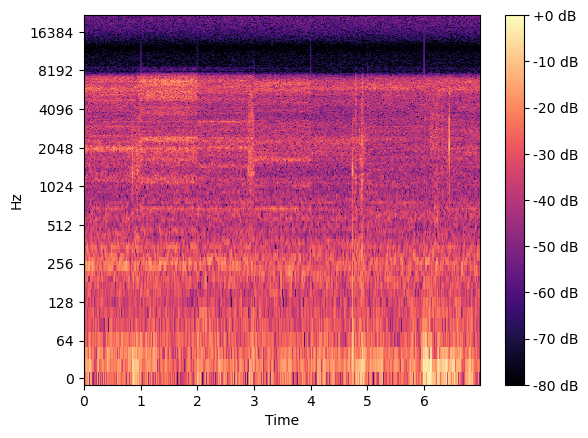

In [10]:
import librosa

D = librosa.stft(aud/np.max(aud))
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
ref = np.max(np.abs(D))

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis="log", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [11]:
joint_energy = {}

for name, audiolist in joint_audio.items():
    speclist = []
    for audio in audiolist:
        speclist.append(np.average(audio**2))#np.average(spec, axis=1)[:, None])
    joint_energy[name] = speclist

In [12]:
joint_energy

{'j_0': [np.float64(1853.1213605442176),
  np.float64(2561.8484353741496),
  np.float64(1900.0478911564626)],
 'j_1': [np.float64(3133.3054421768707),
  np.float64(1101.0451020408163),
  np.float64(1168.3394557823128)],
 'j_2': [np.float64(1232.2395464852607),
  np.float64(1858.8225170068026),
  np.float64(1199.1533333333334)],
 'j_3': [np.float64(1001.0082766439909),
  np.float64(820.3260090702947),
  np.float64(1083.0840589569161)],
 'j_4': [np.float64(971.5360317460318), np.float64(1288.0041575326934)],
 'j_5': [np.float64(896.8091156462585),
  np.float64(668.5057369614512),
  np.float64(790.6595691609978)],
 'j_6': [np.float64(1971.8508163265305), np.float64(878.163560090703)]}

In [13]:
audios = []
for audio, energy in zip(joint_audio.values(), joint_energy.values()):
    print(energy)
    max_eng = np.argmax(energy)
    print(max_eng)
    audios.append(audio[max_eng])

[np.float64(1853.1213605442176), np.float64(2561.8484353741496), np.float64(1900.0478911564626)]
1
[np.float64(3133.3054421768707), np.float64(1101.0451020408163), np.float64(1168.3394557823128)]
0
[np.float64(1232.2395464852607), np.float64(1858.8225170068026), np.float64(1199.1533333333334)]
1
[np.float64(1001.0082766439909), np.float64(820.3260090702947), np.float64(1083.0840589569161)]
2
[np.float64(971.5360317460318), np.float64(1288.0041575326934)]
1
[np.float64(896.8091156462585), np.float64(668.5057369614512), np.float64(790.6595691609978)]
0
[np.float64(1971.8508163265305), np.float64(878.163560090703)]
0


In [14]:
spectras = [np.average(np.abs(librosa.stft(audio/np.max(audio), n_fft=8192)), axis=1) for audio in audios]

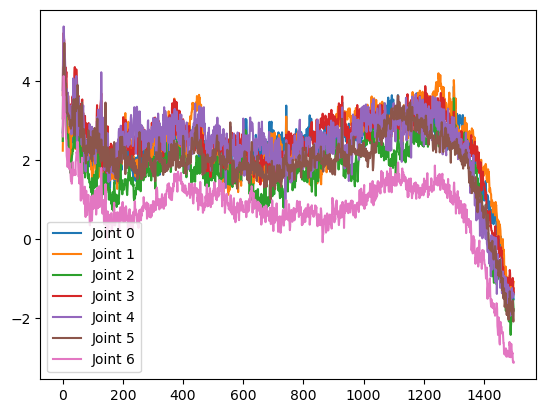

In [15]:
for i, spec in enumerate(spectras):
    plt.plot(np.log(spec[:1500]), label=f"Joint {i}")

plt.legend()

Text(0.5, 0, 'Joint')

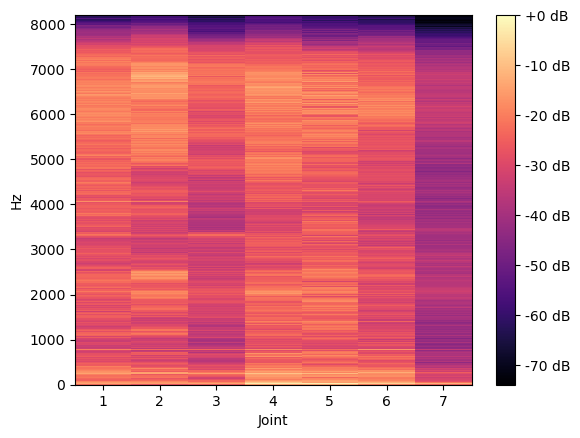

In [20]:
S_db = librosa.amplitude_to_db(np.hstack([spec[:,None] for spec in spectras]), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db[:1500,:], sr=sr, ax=ax, y_axis="hz", x_coords=np.arange(7), y_coords=np.linspace(0,8200,1500),x_axis="s")#, n_fft=8192) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.xaxis.set_major_formatter(lambda x, pos: pos)
ax.set_xlabel("Joint")

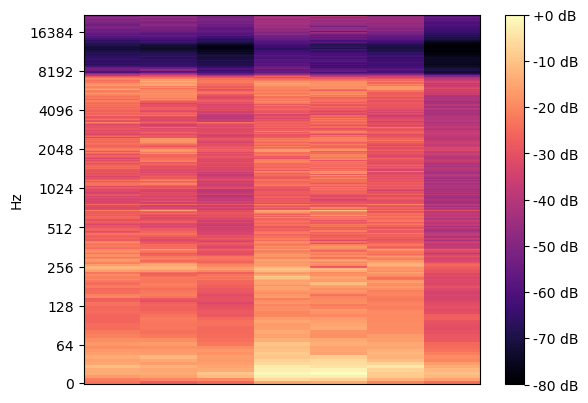

In [89]:
S_db = librosa.amplitude_to_db(np.hstack([spec[:,None] for spec in spectras]), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, ax=ax, y_axis="log")#, n_fft=8192) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")

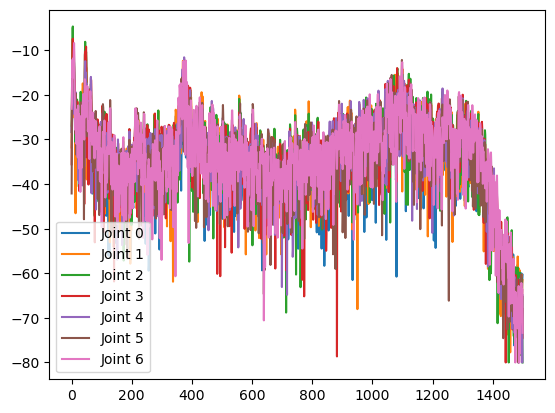

In [24]:
for i, spec in enumerate(spectras):
    plt.plot(S_db[:1500,i], label=f"Joint {i}")

plt.legend()

In [16]:
0.3*sr

13230.0

In [17]:
np.log2(0.3*sr)

np.float64(13.69152544116604)

In [18]:
2**14

16384

In [19]:
joint_spectra = {}
for name, audiolist in joint_audio.items():
    speclist = []
    for audio in audiolist[:1]:
        spec = librosa.stft(audio/np.max(audio), n_fft=8192)
        speclist.append(spec)#np.average(spec, axis=1)[:, None])
    joint_spectra[name] = speclist

In [20]:
spec = []
for name, specs in joint_spectra.items():
    spec += specs
    print(name)

spec = np.hstack(spec)

j_0
j_1
j_2
j_3
j_4
j_5
j_6


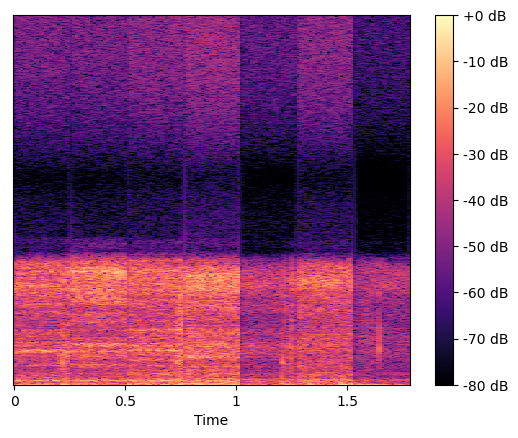

In [21]:
S_db = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', ax=ax, n_fft=8192) #y_axis="log", 
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [22]:
spec.shape

(4097, 154)

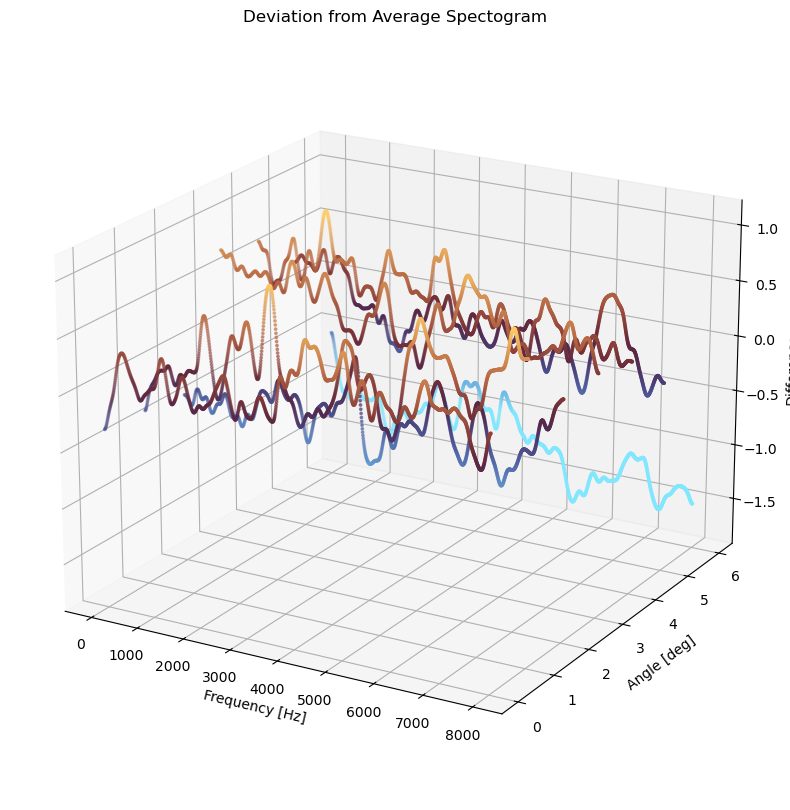

In [88]:
from scipy.ndimage import gaussian_filter1d
from cmcrameri import cm  # more colormaps, esp diverging w/black middle

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


avg = np.mean(np.log(np.array(spectras)[:,:1300]), axis=0)

mins = []
maxs = []

for i, spec in enumerate(spectras):
    spectrum = gaussian_filter1d(np.log(spec[:1300]) - avg, 10)
    mins.append(np.min(spectrum))
    maxs.append(np.max(spectrum))
    ax.scatter(np.linspace(0,8000,1300), i, spectrum, c=spectrum, s=3, vmin=-1, vmax=1, cmap=cm.managua_r)#, c=gaussian_filter1d(np.log(X[i, :])-np.log(avg), 7))

# Labels and title
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Angle [deg]')
ax.set_zlabel('Difference')
ax.set_title('Deviation from Average Spectogram')
ax.view_init(20,-60,0)


In [69]:
np.log(np.array(spectras)[:,:1300]).shape

(7, 1300)

In [72]:
min(mins), max(maxs)

(np.float64(-1.7213995345657116), np.float64(1.0224871805291134))

TypeError: can only concatenate str (not "int") to str

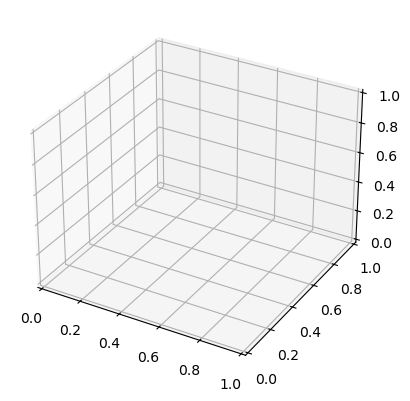

In [56]:
import math

import matplotlib.pyplot as plt
import numpy as np

gamma = np.vectorize(math.gamma)
N = 31
x = np.linspace(0., 10., N)
lambdas = range(1, 9)

ax = plt.figure().add_subplot(projection='3d')

facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(lambdas)))

for i, l in enumerate(lambdas):
    # Note fill_between can take coordinates as length N vectors, or scalars
    ax.fill_between(x, l, l**x * np.exp(-l) / gamma(x + 1),
                    x, l, 0,
                    facecolors=facecolors[i], alpha=.7)

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()


In [48]:
verts[1]

IndexError: list index out of range

In [61]:
np.array(spectras).shape

(7, 4097)